In [27]:
from fastai.vision.all import *
matplotlib.rc('image', cmap='Greys')

In [28]:
mnist_path = untar_data(URLs.MNIST)

In [29]:
Path.BASE_PATH = mnist_path

In [30]:
(mnist_path/'testing/').ls().sorted()

(#10) [Path('testing/0'),Path('testing/1'),Path('testing/2'),Path('testing/3'),Path('testing/4'),Path('testing/5'),Path('testing/6'),Path('testing/7'),Path('testing/8'),Path('testing/9')]

In [31]:
test_ds = []
train_ds = []

def populate(l,_path):
  for p in _path.ls().sorted():
    print(p)
    l.append([Image.open(x) for x in p.ls()])

In [32]:
populate(train_ds,(mnist_path/'training/'))
populate(test_ds,(mnist_path/'testing/'))

/root/.fastai/data/mnist_png/training/0
/root/.fastai/data/mnist_png/training/1
/root/.fastai/data/mnist_png/training/2
/root/.fastai/data/mnist_png/training/3
/root/.fastai/data/mnist_png/training/4
/root/.fastai/data/mnist_png/training/5
/root/.fastai/data/mnist_png/training/6
/root/.fastai/data/mnist_png/training/7
/root/.fastai/data/mnist_png/training/8
/root/.fastai/data/mnist_png/training/9
/root/.fastai/data/mnist_png/testing/0
/root/.fastai/data/mnist_png/testing/1
/root/.fastai/data/mnist_png/testing/2
/root/.fastai/data/mnist_png/testing/3
/root/.fastai/data/mnist_png/testing/4
/root/.fastai/data/mnist_png/testing/5
/root/.fastai/data/mnist_png/testing/6
/root/.fastai/data/mnist_png/testing/7
/root/.fastai/data/mnist_png/testing/8
/root/.fastai/data/mnist_png/testing/9


In [33]:
im9 = train_ds[9][0]
im9_t = tensor(im9)
df = pd.DataFrame(im9_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,124,169,207,218,71,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,43,153,238,253,254,254,228,254,150,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,134,251,254,217,138,54,8,56,254,150,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,18,199,253,217,65,6,0,0,32,180,254,155,70,20,0,0,0,0,0


#MODEL 1
# take an average & see the distance from the average . Kind of similar to idea of k means , jusst the centroid will be average of the training set

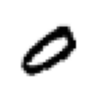

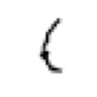

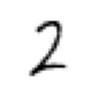

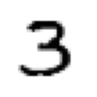

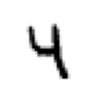

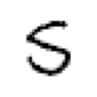

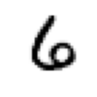

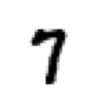

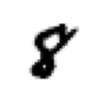

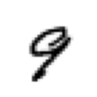

In [38]:
for i in range(0,10):
  show_image(train_ds[i][0])

In [65]:
test_ds = []
train_ds = []

def populate(l,_path):
  for p in _path.ls().sorted():
    l.append([tensor(Image.open(x)) for x in p.ls()])

In [66]:
populate(train_ds,(mnist_path/'training/'))
populate(test_ds,(mnist_path/'testing/'))
type(train_ds[0][0])

torch.Tensor

In [67]:
test_ds = [torch.stack(x) for x in test_ds]
train_ds = [torch.stack(x) for x in train_ds]


In [70]:
for i in range(0,10):
  print(i,f" training set has {train_ds[i].shape[0]} samples")

0  training set has 5923 samples
1  training set has 6742 samples
2  training set has 5958 samples
3  training set has 6131 samples
4  training set has 5842 samples
5  training set has 5421 samples
6  training set has 5918 samples
7  training set has 6265 samples
8  training set has 5851 samples
9  training set has 5949 samples


In [71]:
# data standardization -> scale to 0-1
test_ds = [x/255 for x in test_ds]
train_ds = [x/255 for x in train_ds]


In [79]:
train_ds[0].max(),train_ds[0].min(),train_ds[0].ndim,train_ds[0].shape

(tensor(1.), tensor(0.), 3, torch.Size([5923, 28, 28]))

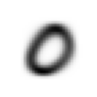

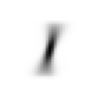

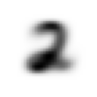

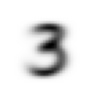

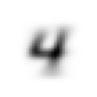

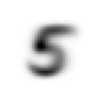

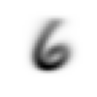

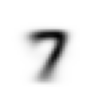

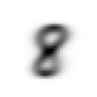

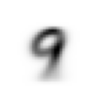

In [83]:
means = [x.mean(0) for x in train_ds]
for x in means:
  show_image(x)

In [84]:
from torch.nn.functional import mse_loss

In [85]:
for i,(t,m) in enumerate(zip(train_ds,means)):
  print(i,F.mse_loss(t,m).sqrt())

0 tensor(0.2523)
1 tensor(0.1693)
2 tensor(0.2545)
3 tensor(0.2394)
4 tensor(0.2283)
5 tensor(0.2464)
6 tensor(0.2344)
7 tensor(0.2186)
8 tensor(0.2412)
9 tensor(0.2218)


<ipython-input-85-79365ce7de79>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([5923, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print(i,F.mse_loss(t,m).sqrt())
<ipython-input-85-79365ce7de79>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([6742, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print(i,F.mse_loss(t,m).sqrt())
<ipython-input-85-79365ce7de79>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([5958, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  print(i,F.mse_loss(t,m).sqrt())
<ipython-input-85-79365ce7de79>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the in

In [94]:
def mnist_distance(a,b):
  l1=((a-b).abs()).mean((-1,-2))
  print(a.shape,b.shape,l1.shape)
  return l1

In [142]:
results = {}
for i in range(0,10):
  results[i]={}
  for j in range(0,10):
      results[i][j] = mnist_distance(test_ds[i],means[j])


torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([980, 28, 28]) torch.Size([28, 28]) torch.Size([980])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([1135, 28, 28]) torch.Size([28, 28]) torch.Size([1135])
torch.Size([113

In [143]:
for i in range(0,10):
  for j in range(1,10):
    assert results[i][j].shape==results[i][j-1].shape

In [144]:
result_final = []

for i in range(10):
    leni = len(results[i][0])
    result_i = []
    for sample in range(leni):
        min_j = min(range(10), key=lambda j: results[i][j][sample])
        result_i.append(min_j == i)
    result_final.append(np.array(result_i))  # note: converting each list to np.array

In [145]:
result_final2 = [
    [
        (min(range(10), key=lambda j: results[i][j][sample]) == i)
        for sample in range(len(results[i][0]))
    ]
    for i in range(10)
]

In [146]:
for x,y in zip (result_final,result_final2):
  for r,l in zip(x,y):
    assert r==l

In [150]:
for x in range(10):
  correct = 0
  for item in result_final[x]:
    if item==True:
      correct+=1
  print(f"accuracy for {x} is {correct/len(result_final[x])}")

accuracy for 0 is 0.8153061224489796
accuracy for 1 is 0.9982378854625551
accuracy for 2 is 0.42344961240310075
accuracy for 3 is 0.6089108910891089
accuracy for 4 is 0.6680244399185336
accuracy for 5 is 0.32623318385650224
accuracy for 6 is 0.7870563674321504
accuracy for 7 is 0.7645914396887159
accuracy for 8 is 0.44250513347022585
accuracy for 9 is 0.77601585728444


In [148]:
for x in range(10):
  print(np.mean(result_final[x]))

0.8153061224489796
0.9982378854625551
0.42344961240310075
0.6089108910891089
0.6680244399185336
0.32623318385650224
0.7870563674321504
0.7645914396887159
0.44250513347022585
0.77601585728444


Now we have baseline numbers using mean of accuracy using mean as the measure of performace

Next will try same using a NN